## Cell 1:

In [1]:
#Program to calculate depths from empty aperture simulation results
import numpy as np
import math
import astropy.table
import matplotlib as mpl
import matplotlib.pyplot as plt
import os,random,time
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages
from astropy.io import fits
import scipy.stats as ss
from astropy.modeling import models, fitting
import sys
from array import array
import pylab as pl
from IPython.display import IFrame
import depthcalc
import calculatin as calc

## Cell 2:

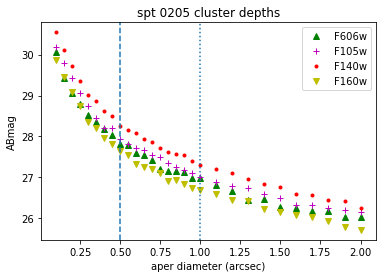

27.824079332292317 27.94458369558919 28.255211820772015 27.651042817649937
for aperture 0.5 , blue band depth limit is 27.824079332292317  and red band depth limit is 27.94458369558919 in AB magnitude


In [5]:
#cell2
#declare which files you are using for the empty aperture calculations, and which original science images they refer to
#comment or uncomment appropriate lines given the available data (if your cluster doesn't have F105w data, 
#for example, you'll have to comment out the parts that refer to file105 including the calculations of mags105 and sigs105)
file606= '/home/k689j329/database/emptyApertureAnalysis_share/aperflux/all_j0205_f606w_osnn3m_aps.txt'
#file814= '/home/k689j329/database/emptyApertureAnalysis_share/aperflux/all_j16_f814w_osnn3_aps.txt'
file105= '/home/k689j329/database/emptyApertureAnalysis_share/aperflux/all_j0205_f105w_osnn3m_aps.txt'
file140= '/home/k689j329/database/emptyApertureAnalysis_share/aperflux/all_j0205_f140w_osnn3m_aps.txt'
file160= '/home/k689j329/database/emptyApertureAnalysis_share/aperflux/all_j0205_f160w_osnn3m_aps.txt'

filenames606=np.loadtxt(file606,dtype='str')
#filenames814=np.loadtxt(file814,dtype='str')
filenames105=np.loadtxt(file105,dtype='str')
filenames140=np.loadtxt(file140,dtype='str')
filenames160=np.loadtxt(file160,dtype='str')


original606= '/home/k689j329/HSTdata/j020548m5829/j020548m5829-f606w_drc_sci.fits'
#original814= '/home/k689j329/HSTdata/j160116m0029/j160116m0029-f814w_drc_sci.fits'
orig105    = '/home/k689j329/HSTdata/j020548m5829/j020548m5829-f105w_drz_sci.fits'
orig140    = '/home/k689j329/HSTdata/j020548m5829/j020548m5829-f140w_drz_sci.fits'
orig160    = '/home/k689j329/HSTdata/j020548m5829/j020548m5829-f160w_drz_sci.fits'

hdu606=fits.open(original606)
#hdu814=fits.open(original814)
hdu105=fits.open(orig105)
hdu140=fits.open(orig140)
hdu160=fits.open(orig160)

hdr606=hdu606[0].header
#hdr814=hdu814[0].header
hdr105=hdu105[0].header
hdr140=hdu140[0].header
hdr160=hdu160[0].header
holdphots606=[hdr606['PHOTFLAM'],hdr606['PHOTPLAM']]
#holdphots814=[hdr814['PHOTFLAM'],hdr814['PHOTPLAM']]
holdphots105=[hdr105['PHOTFLAM'],hdr105['PHOTPLAM']]
holdphots140=[hdr140['PHOTFLAM'],hdr140['PHOTPLAM']]
holdphots160=[hdr160['PHOTFLAM'],hdr160['PHOTPLAM']]
hdu606.close()
#hdu814.close()
hdu105.close()
hdu140.close()
hdu160.close()

#arcsec
apers=np.array([0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0])
#linear size: linearsize=0.5*np.array(apers)/pixscale 
aper606 = 0.5*apers/0.05
#print(aper606)
#aper814 = 0.5*apers/0.05
aper105 = 0.5*apers/0.1
aper140 = 0.5*apers/0.1
aper160 = 0.5*apers/0.1

mags606=[]
mags814=[]
mags105=[]
mags140=[]
mags160=[]
sigs606=[]
sigs814=[]
sigs105=[]
sigs140=[]
sigs160=[]

#if you want to do histogram fitting in here, you need to declare a bunch of empty structures like this
#and then call fithists in the loops below; but it's unnecessary
#histogram_fblue={}
#histogram_fred={}
#keynames_fblue=[]
#keynames_fred=[]


#these loops perform the analysis for the given cluster and each of its bands
##just comment out the ones not applicable to your dataset
for x in filenames606:
#    infile='../emptyApertureAnalysis_share/aperflux/'+str(x)
    infile=str(x)
    mags,sigs=depthcalc.depth(infile,holdphots606)
    mags606.append(mags)
    sigs606.append(sigs)
###    holdhists1,nameout1=depthcalc.fithists(infile,binnum=100)
###    histdict1={nameout1:holdhists1}
###    histogram_fblue.update(histdict1)
###    keynames_fblue.append(nameout1)
    
#-----this chunk is only necessary for the bluward j003548m4312, which timed out after 24 hours for F814w
#holdthese=[23.0,23.0,23.0,23.0]
#for i in holdthese:
#    sigs_fblue.append(0)
#    mags_fblue.append(i)
#shortie=len(sigs_fblue)
#aper1b=aper1b[0:shortie]
#-----------------

#for y in filenames814:
#    infile2='../emptyApertureAnalysis_share/aperflux/'+str(y)
#    infile2=str(y)
#    mags2,sigs2=depthcalc.depth(infile2,holdphots814)
#    mags814.append(mags2)
#    sigs814.append(sigs2)
#    holdhists2,nameout2=depthcalc.fithists(infile2,binnum=100)
#    histdict2={nameout2:holdhists2}
#    histogram_fred.update(histdict2)
#    keynames_fred.append(nameout2)

for z in filenames105:
    infilen=str(z)
#    infilen='../emptyApertureAnalysis_share/aperflux/'+str(z)
    magn,sign=depthcalc.depth(infilen,holdphots105)
    mags105.append(magn)
    sigs105.append(sign)

for w in filenames140:
#    infilew='../emptyApertureAnalysis_share/aperflux/'+str(w)
    infilew=str(w)
    magw,sigw=depthcalc.depth(infilew,holdphots140)
    mags140.append(magw)
    sigs140.append(sigw)

for v in filenames160:
    infilev=str(v)
#    infilev='../emptyApertureAnalysis_share/aperflux/'+str(v)
    magv,sigv=depthcalc.depth(infilev,holdphots160)
    mags160.append(magv)
    sigs160.append(sigv)

plt.plot(apers,mags606,'g^',label='F606w')
#plt.plot(apers,mags814,'b*',label='F814w')
plt.plot(apers,mags105,'m+',label='F105w')
plt.plot(apers,mags140,'r.',label='F140w')
plt.plot(apers,mags160,'yv',label='F160w')
plt.title('spt 0205 cluster depths')
plt.axvline(x=1.0,linestyle=':')
plt.axvline(x=0.50,linestyle='--')
#plt.hlines(y=29.5,xmin=0,xmax=2.0,linestyle=':')
plt.xlabel('aper diameter (arcsec)')
plt.ylabel('ABmag')
plt.legend(loc='upper right')
plt.show()

#plt.savefig(pdfoutname)

#note, [8] designates the aperture associated with a 0.5 arcsec diameter. 
print(mags606[8],mags105[8],mags140[8],mags160[8])
print('for aperture',apers[8],', blue band depth limit is',mags606[8],' and red band depth limit is',mags105[8],'in AB magnitude')

## Cell 3:

In [6]:
#Cell 3
###########RMS calculations

#once you've chosen which images have sufficient depths for your desired comparison, make segmentation images
#for them and calculate the associated rms values for the metatable
print('RMS Calculations:')
#set up plotting inputs
apers=np.array([0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0])

#note here which bands you've selected
#for example, for j1049 I'm using F105w as my 'blue' band and F160w as my 'red' band
#blue == F105w
#red == F160w
#for j160116 I'm using f814w for blue and f160w for red
#for sPT 0205 I'm using f606w for blue and f140w for red
aper_b=aper606
sigs_b=sigs606
aper_r=aper140
sigs_r=sigs140


##choosing to do the analysis on the non-normalized original science images of fits_scib and fits_sci
#bluedata
fits_scib= '/home/k689j329/HSTdata/j020548m5829/j020548m5829-f606w_drc_sci.fits'
fits_maskb= '/home/k689j329/HSTdata/j020548m5829/j020548m5829-f606w_drc_sci_mask.fits'
fits_segb= '/home/k689j329/HSTdata/j020548m5829/j0205_f606w_seg_maskd.fits'
#reddata
fits_sci= '/home/k689j329/HSTdata/j020548m5829/j020548m5829-f140w_drz_sci.fits'
fits_mask= '/home/k689j329/HSTdata/j020548m5829/j020548m5829-f140w_drz_sci_mask.fits'
fits_seg= '/home/k689j329/HSTdata/j020548m5829/j0205_f140w_seg_maskd.fits'


#calculate the RMS of the original science images
rmss,aper1=depthcalc.rmscalc(fits_sci,fits_mask,fits_seg,apers,pixscale=0.1)
rmsvals=rmss*aper1
print('RMS of original sci image, redward',rmss)


rmssb,aper1b=depthcalc.rmscalc(fits_scib,fits_maskb,fits_segb,apers,pixscale=0.05)
rmsvalsb=rmssb*aper1b
print('RMS of original sci image blueward',rmssb)






RMS Calculations:
STDEV of all "valid" pixels in scidata: 0.017499708
rms actual (square root of the mean of the squared values of all valid data points): 0.017499916
RMS of original sci image, redward 0.017499708
STDEV of all "valid" pixels in scidata: 0.008438031
rms actual (square root of the mean of the squared values of all valid data points): 0.008463466
RMS of original sci image blueward 0.008438031


## Cell 4:

In [7]:
#cell 4
#once you've chosen which images have sufficient depths for your desired comparison, make segmentation images
#for them and calculate the associated rms values for the metatable

modelb=models.Polynomial1D(degree=2,c0=0.0)
modelb.c0.fixed=True
fitter_poly=fitting.LinearLSQFitter()
best_blue=fitter_poly(modelb,aper_b,sigs_b)

modelr=models.Polynomial1D(degree=2,c0=0.0)
modelr.c0.fixed=True
best_red=fitter_poly(modelr,aper_r,sigs_r)
print('2nd order polynomial for  (blue) for j2106')
print(best_blue)
print('2nd order polynomial for  (red) j2106')
print(best_red)



2nd order polynomial for  (blue) for j2106
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
     c0          c1                   c2          
    --- ------------------- ----------------------
    0.0 0.01086983571371145 0.00027074925281944434
2nd order polynomial for  (red) j2106
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
     c0          c1                    c2         
    --- -------------------- ---------------------
    0.0 0.011688195075305729 0.0011639459980071329


## Obsolete/works in progress below; vaguely useful for demonstration of fitting, plotting
##### but mostly, just ignore below here

poly2 red
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
     c0          c1                    c2         
    --- -------------------- ---------------------
    0.0 0.015625414585269438 0.0013107050606347883
poly2 blue
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
     c0          c1                    c2          
    --- -------------------- ----------------------
    0.0 0.005538353534038515 0.00017379929809252262


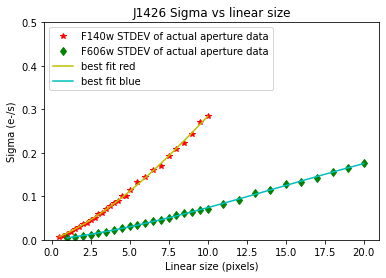

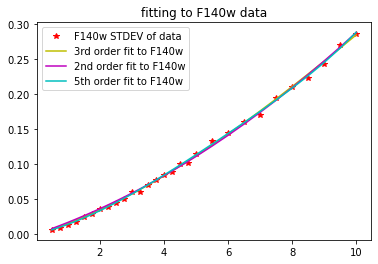

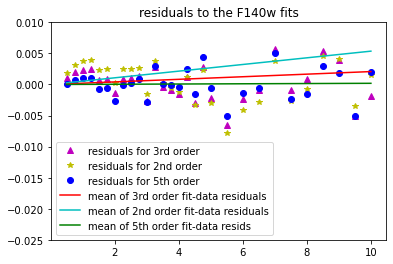

In [32]:
########OKAY, now to fitting the sigs_fred and sigs_fblue
#Labbe fits a 2nd order polynomial
#standard procedure is define model, define fitter, and fit the data (http://learn.astropy.org/rst-tutorials/Models-Quick-Fit.html)
# maybe try a couple different fitters and see if the reduced chi squared value is better for different one (use calculatin.py)

sigs_fred=sigs140
sigs_fblue=sigs606

model_poly=models.Polynomial1D(degree=3,c0=0.0)
model_poly.c0.fixed=True
fitter_poly=fitting.LinearLSQFitter()
best_fit_poly_red = fitter_poly(model_poly, aper1, sigs_fred)




model2=models.Polynomial1D(degree=2,c0=0.0)
model2.c0.fixed=True
model5=models.Polynomial1D(degree=5,c0=0.0)
model5.c0.fixed=True
best_fit_poly_red2 = fitter_poly(model2,aper1,sigs_fred)
best_red5=fitter_poly(model5,aper1,sigs_fred)
best_fit_poly_blue = fitter_poly(model_poly,aper1b,sigs_fblue)
best_fit_poly_blue2= fitter_poly(model2,aper1b,sigs_fblue)
best_blue5=fitter_poly(model5,aper1b,sigs_fblue)
print('poly2 red')
print(best_fit_poly_red2)
print('poly2 blue')
print(best_fit_poly_blue2)

#print(best_fit_poly_blue)
#NOTE: apparently this doesn't fit as well if you feed apers instead of aper1 and aper1b

#plt.plot(aper1,sigvals,'m^',label='F140w STDEV of Gaussian fit to histogram')
plt.plot(aper1,sigs_fred,'r*',label='F140w STDEV of actual aperture data')
#plt.plot(aper1b,sigvalsb,'bo',label='F606w STDEV of Gaussian fit to hist')
plt.plot(aper1b,sigs_fblue,'gd',label='F606w STDEV of actual aperture data')
#how do I fit the results of bestfitpoly?
plt.plot(aper1,best_fit_poly_red(aper1),color='y',label='best fit red')
plt.plot(aper1b,best_fit_poly_blue(aper1b),color='c',label='best fit blue')
plt.title('J1426 Sigma vs linear size')
plt.xlabel('Linear size (pixels)')
plt.ylabel('Sigma (e-/s)')
#plt.plot(aper1b,rmsvalsb,label='Gaussian noise F814w') #replace second xvals with rmsvals once rmsvals are calculated and added to github
#plt.plot(aper1,rmsvals,label='Gaussian noise F160w')
plt.legend(loc='upper left')
#plt.yscale('log')
plt.ylim(bottom=0,top=0.5)
#plt.xlim(left=0,right=100)
#plt.savefig('j16_problemwithlabbeplot2.png')
plt.show()


plt.plot(aper1,sigs_fred,'r*',label='F140w STDEV of data')
plt.title('fitting to F140w data')
plt.plot(aper1,best_fit_poly_red(aper1),color='y',label='3rd order fit to F140w')
plt.plot(aper1,best_fit_poly_red2(aper1),color='m',label='2nd order fit to F140w')
plt.plot(aper1,best_red5(aper1),color='c',label='5th order fit to F140w')
plt.legend(loc='upper left')
plt.show()
plt.plot(aper1,(best_fit_poly_red(aper1)-sigs_fred),'m^',label='residuals for 3rd order')
plt.plot(aper1,(best_fit_poly_red2(aper1)-sigs_fred),'y*',label='residuals for 2nd order')
plt.plot(aper1,(best_red5(aper1)-sigs_fred),'bo',label='residuals for 5th order')
plt.plot(aper1,(aper1*np.mean(best_fit_poly_red(aper1)-sigs_fred)),color='r',label='mean of 3rd order fit-data residuals')
plt.plot(aper1,(aper1*np.mean(best_fit_poly_red2(aper1)-sigs_fred)),color='c',label='mean of 2nd order fit-data residuals')
plt.plot(aper1,(aper1*np.mean(best_red5(aper1)-sigs_fred)),color='g',label='mean of 5th order fit-data resids')
plt.legend(loc='lower left')
plt.title('residuals to the F140w fits')
plt.ylim(bottom=-0.025,top=0.01)
plt.show()


# WARNING: Below here is experimental DOES NOT WORK    
# WARNING: Below here is experimental DOES NOT WORK    
# WARNING: Below here is experimental DOES NOT WORK


so let me outline what I want to do: for a given fits file that I'm analyzing:
1. read in a list of filenames from the eAA program
2. for each file (ap size) in that list, calculate the associated 5sigma depth and output it (append it to an array or dictionary)
3. for each file (ap size) produce a histogram of the data and a gaussian fit to it, then output the gaussian fit parameters (AND the histogram parameters, so I can plot them later all at once instead of one at a time?)
4. for each fits file I'm analyzing, calculate the rms--I don't think I can do this step without uploading .fits files, though, so consider doing it on the computer and making a lil file with all the rms functions in it that can be access later
5. for each object in list1, produce a plot of all the histograms/gaussian fits on top of each other
6. for each fits file I'm analyzing, produce a sigma-vs-linear-size plot (Labbe-esque)

after looping through each object in the list, I will have a file of depth measurements, gaussian fits, and (maybe) histogram parameters, as well as the aperture sizes. then I want to
1. display all the histograms, with the x and y axis fixed so the fwhm change is visible; on top of each other would be good
2. plot the sigma-from-gaussian-fitting versus linear-size-of-apertures plot from Labbe 03 and overplot a y=mx+b relation for the gaussian rms (rms per pixel/size unit, * the linear-size-of-apertures, I assume. or a huge range in x/pixel/size, that's okay too)
3. make depth as a function of aperture size plot (basically the same as 2, but with the magnitudes instead of the sigmas and arcsec aps instead of linear size/pixels

So I need two parts to the program: one part that loops through the files in the filename list, and appends all the outputs; and another part that deals with the bulk outputs

2nd order polynomial for B2R convolved for J2106
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
     c0           c1                    c2          
    --- --------------------- ----------------------
    0.0 0.0050186259125261385 0.00030063450572129555
STDEV of all "valid" pixels in scidata: 0.0023811276472987895
rms actual (square root of the mean of the squared values of all valid data points): 0.002384890537943469
rms of original (not yetregistered, convolved science image used for photometry) 0.0023811276472987895


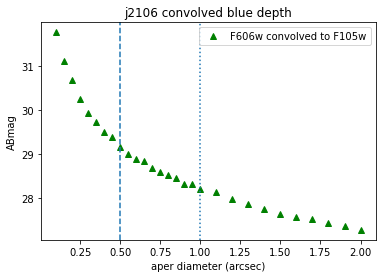

In [4]:
#this cell does this for one image and band; see below cells for more than 1 image/band combination

file_b2r='../emptyApertureAnalysis_share/aperflux/all_j2106_b2r_exconv_osnn3m_apers.txt'
og_b2r='../../HSTdata/j2106_blue2red_exact_conv_apr21_5.fits'
seg_b2r='../../HSTdata/j2106_b2r_exact_conv_apr21_5_nn3_seg.fits'
mask_b2r='../../HSTdata/j2106_blue2red_exact_conv_apr21_5_mask.fits'

names=np.loadtxt(file_b2r,dtype='str')

#get parameters out of the header of the original/raw data
hdu_b2r=fits.open(og_b2r)
hdr=hdu_b2r[0].header
holdphotsb2r=[hdr['PHOTFLAM'],hdr['PHOTPLAM']]
holdphots606=holdphotsb2r
hdu_b2r.close()

apers=np.array([0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0])
aperb2r=0.5 * apers/0.1

##go calculate the depth values in AB mag
magsb2r=[]
sigsb2r=[]
for x in names:
#    infile='../emptyApertureAnalysis_share/aperflux/'+str(x)
    infile=str(x)
    mags,sigs=depthcalc.depth(infile,holdphots606)
    magsb2r.append(mags)
    sigsb2r.append(sigs)
    
#plt.plot(apers,magsb2r,'go')

#now do a bunch of fitting
m_b2r_2=models.Polynomial1D(degree=2,c0=0.0)
m_b2r_2.c0.fixed=True
fitter_poly=fitting.LinearLSQFitter()
best_b2r_2=fitter_poly(m_b2r_2,aperb2r,sigsb2r)

#re-update 
### in output catalog: need 1 column for error for each flux
#take fitting formula, apply it to the aperture size using 
#the weight value for the source
#ignore SE errors and replace them with this method!

print('2nd order polynomial for B2R convolved for J2106')
print(best_b2r_2)


#now to get it to calculate the rms per image
psb=0.05
psr=0.1 #pixel scales from the two images

#fits_scib='../../HSTdata/j210604m5845/j210604m5845-f606w_drc_sci.fits'
#fits_maskb='../../HSTdata/j210604m5845/j210604m5845-f606w_drc_sci_mask.fits'
#fits_segb='../../HSTdata/j210604m5845/j2106_f606w_seg_original.fits'
rmssb2r,aperb2r=depthcalc.rmscalc(og_b2r,mask_b2r,seg_b2r,apers,pixscale=psr)
print('rms of original (not yetregistered, convolved science image used for photometry)',rmssb2r)



plt.plot(apers,magsb2r,'g^',label='F606w convolved to F105w')
#plt.plot(apers,mags814,'b*',label='F814w')
#plt.plot(apers,mags105,'m+',label='F105w')
#plt.plot(apers,mags140,'r.',label='F140w')
#plt.plot(apers,mags160,'yv',label='F160w')
plt.title('j2106 convolved blue depth')
plt.axvline(x=1.0,linestyle=':')
plt.axvline(x=0.50,linestyle='--')
#plt.hlines(y=29.5,xmin=0,xmax=2.0,linestyle=':')
plt.xlabel('aper diameter (arcsec)')
plt.ylabel('ABmag')
plt.legend(loc='upper right')
plt.show()

#plt.show()

16.402000172484


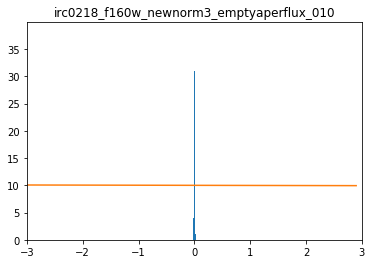

10.021630726019971


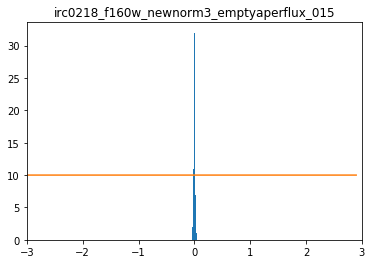

11.92622573568481


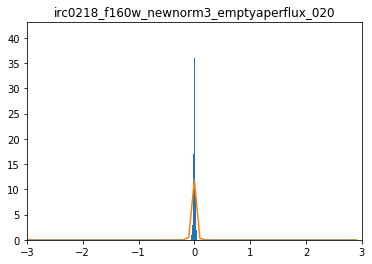

32.832280109101355


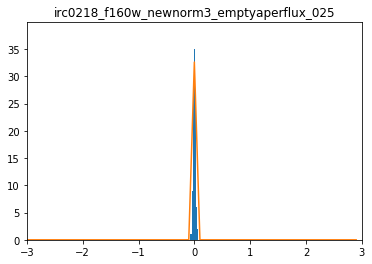

29.423172371612218


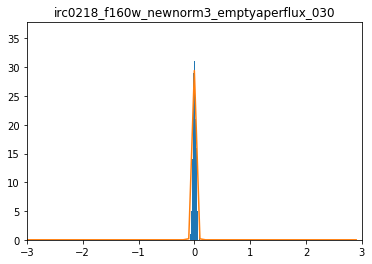

28.90261697960551


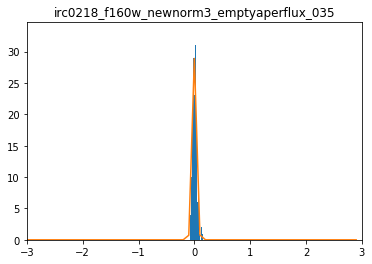

47.40445222074015


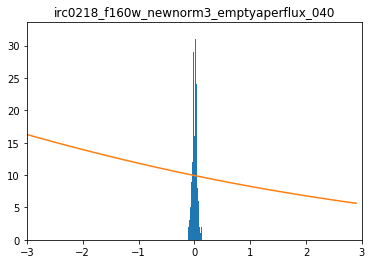

27.611497470930978


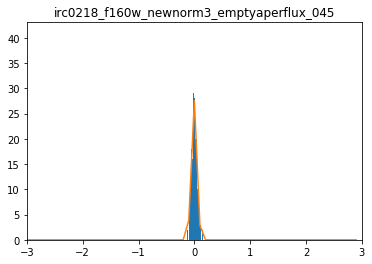

28.59995571152871


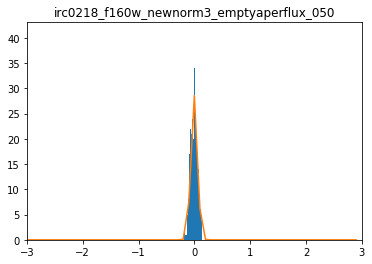

31.09574677046014


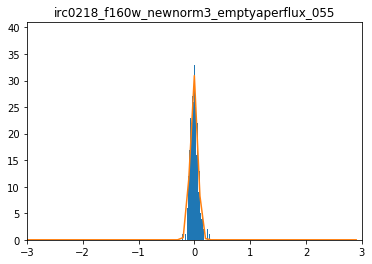

30.223391731677633


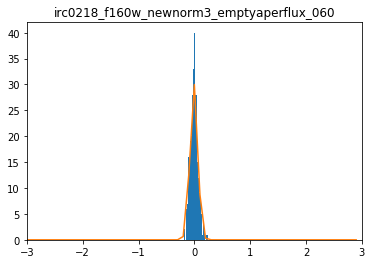

27.890128705231426


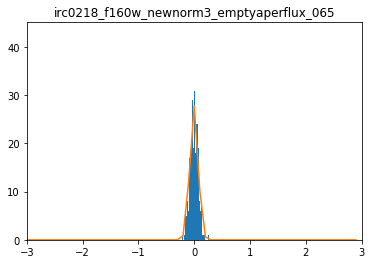

41.78337811516845


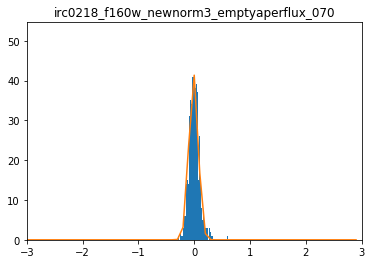

33.259628338746616


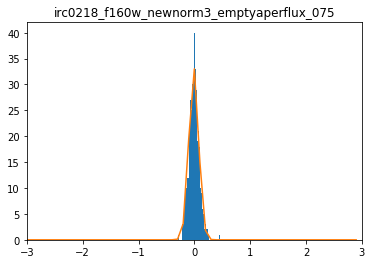

32.98695267726602


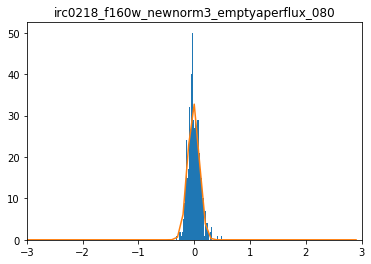

36.738088794887965


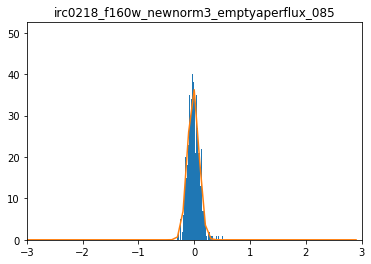

28.407551456867992


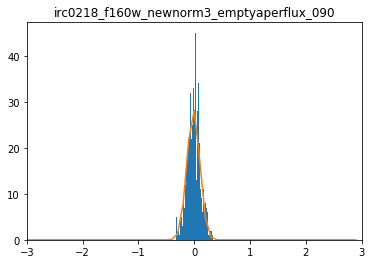

32.6096412489111


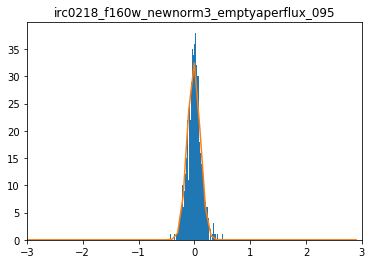

32.510695763138884


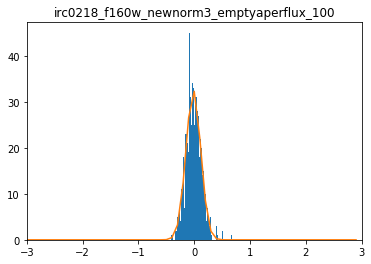

34.794026316567475


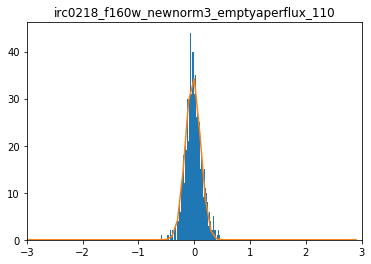

43.57153583957138


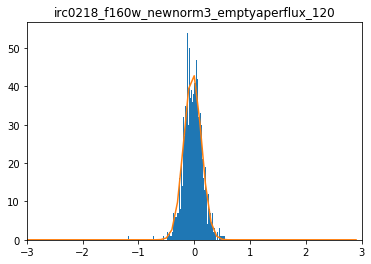

39.934748021747794


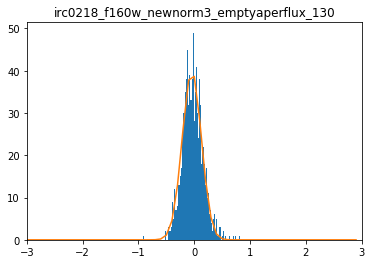

38.384198833995406


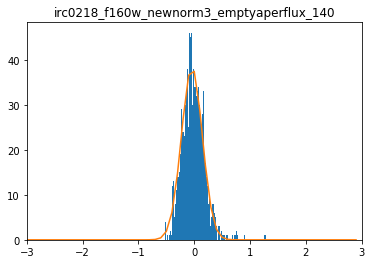

35.86659685337841


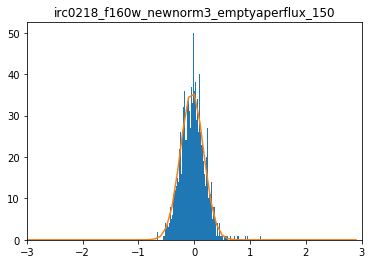

37.17505206042838


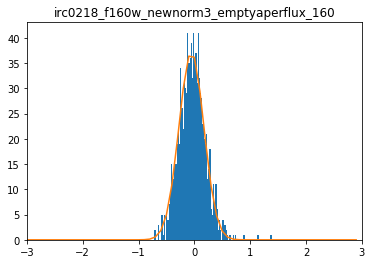

37.108485758395695


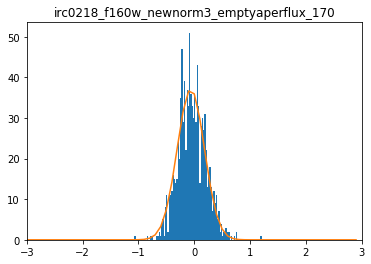

51.86035988241899


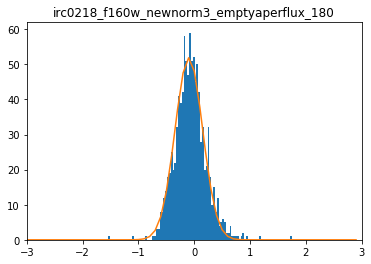

34.58666071656863


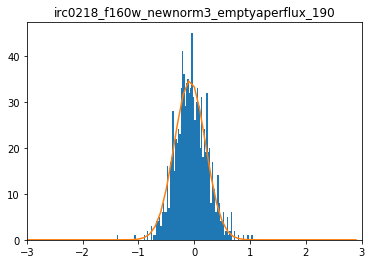

42.11870937533867


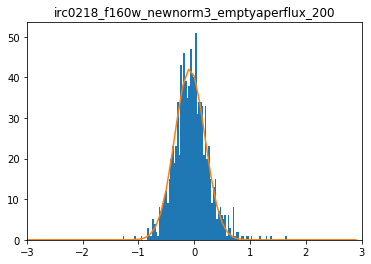

In [5]:
######plotting histograms and their gaussian fits
#this part isn't QUITE working right but given 
#that I've extracted the fit to the data and used it in Labbe-esque plot above, is it necessary? might be nice tho 
#FIX LATER

def gas(x,a,b,c):
    top=-0.5*((x-b)**2.0)
    bottom=c*c
    out=a*np.exp(top/bottom)
    return out

xpts=np.arange(-3,3,0.1)
for y in keynames_new:
    binns=histogram_new[y]['bins']
    data=histogram_new[y]['hist1']
    bestfitp=histogram_new[y]['bestfit']
    print(bestfitp.amplitude.value)
    amps=histogram_new[y]['bestfit'].amplitude.value
    mn=histogram_new[y]['bestfit'].mean.value
    stde=histogram_new[y]['bestfit'].stddev.value
    yvals=gas(xpts,amps,mn,stde)
    plt.clf()
    plt.hist(data,100)
    plt.plot(xpts,yvals)
    plt.xlim([-3,3])
    plt.title(y)
    plt.show()
        #plt.plot(binns[0:np.size(binns)-1],bestfitp[0:np.size(binns)-1])
    
    #okay, displaying individual gaussian fits is a pain in the butt--normally I'd just plt.plot(bins,bestfit(bins))
    #but that isn't working for whatever reason. bestfit is somehow a 1d gaussian thing that plt.plot can't handle

polynomials for f606w
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
     c0          c1                    c2                    c3          
    --- -------------------- --------------------- ----------------------
    0.0 0.004072810728507426 0.0004310300195728394 -9.819089467964702e-06
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
     c0          c1                    c2          
    --- -------------------- ----------------------
    0.0 0.005538353534038515 0.00017379929809252262
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 5
Parameters:
     c0          c1          ...           c4                      c5          
    --- -------------------- ... ---------------------- -----------------------
    0.0 0.003466827754533537 ... 1.3379541835774794e-06 -2.2483846724268934e-08


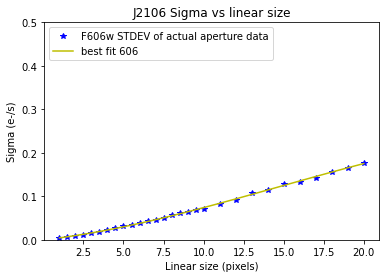

In [23]:
########OKAY, now to fitting the sigs_fred and sigs_fblue
#Labbe fits a 2nd order polynomial
#standard procedure is define model, define fitter, and fit the data (http://learn.astropy.org/rst-tutorials/Models-Quick-Fit.html)
# maybe try a couple different fitters and see if the reduced chi squared value is better for different one (use calculatin.py)

model_poly=models.Polynomial1D(degree=3,c0=0.0)
model_poly.c0.fixed=True
fitter_poly=fitting.LinearLSQFitter()
best_fit_poly606 = fitter_poly(model_poly, aper606, sigs606)


model2=models.Polynomial1D(degree=2,c0=0.0)
model2.c0.fixed=True
model5=models.Polynomial1D(degree=5,c0=0.0)
model5.c0.fixed=True
best_fit_poly_6062 = fitter_poly(model2,aper606,sigs606)
best_6065=fitter_poly(model5,aper606,sigs606)


print('polynomials for f606w')
print(best_fit_poly606)
print(best_fit_poly_6062)
print(best_6065)
#NOTE: apparently this doesn't fit as well if you feed apers instead of aper1 and aper1b

#plt.plot(aper1,sigvals,'m^',label='F160w STDEV of Gaussian fit to histogram')
plt.plot(aper606,sigs606,'b*',label='F606w STDEV of actual aperture data')
#plt.plot(aper1b,sigvalsb,'bo',label='F814w STDEV of Gaussian fit to hist')
#plt.plot(aper1b,sigs_fblue,'gd',label='F814w STDEV of actual aperture data')
#how do I fit the results of bestfitpoly?
plt.plot(aper606,best_fit_poly606(aper606),color='y',label='best fit 606')
#plt.plot(aper1b,best_fit_poly_blue(aper1b),color='c',label='best fit blue')
plt.title('J2106 Sigma vs linear size')
plt.xlabel('Linear size (pixels)')
plt.ylabel('Sigma (e-/s)')
#plt.plot(aper1b,rmsvalsb,label='Gaussian noise F814w') #replace second xvals with rmsvals once rmsvals are calculated and added to github
#plt.plot(aper1,rmsvals,label='Gaussian noise F160w')
plt.legend(loc='upper left')
#plt.yscale('log')
plt.ylim(bottom=0,top=0.5)
#plt.xlim(left=0,right=100)
plt.show()


#plots of the fits below
#plt.plot(aper606,sigs606,'b*',label='F606w STDEV of data')
#plt.plot(aper606,best_fit_poly606(aper606),color='y',label='3rd order fit to F606w')
#plt.plot(aper606,best_fit_poly_6062(aper606),color='m',label='2nd order fit to F606W')
#plt.plot(aper606,best_6065(aper606),color='c',label='5th order fit to F606w')
#plt.legend(loc='upper left')
#plt.show()

#residuals plots below
#plt.plot(aper606,(best_fit_poly606(aper606)-sigs606),'m^',label='residuals for 3rd order')
#plt.plot(aper606,(best_fit_poly_6062(aper606)-sigs606),'y*',label='residuals for 2nd order')
#plt.plot(aper606,(best_6065(aper606)-sigs606),'bo',label='residuals for 5th order')
#plt.plot(aper606,(aper606*np.mean(best_fit_poly606(aper606)-sigs606)),color='r',label='mean of 3rd order fit-data residuals')
#plt.plot(aper606,(aper606*np.mean(best_fit_poly_6062(aper606)-sigs606)),color='c',label='mean of 2nd order fit-data residuals')
#plt.plot(aper606,(aper606*np.mean(best_6065(aper606)-sigs606)),color='g',label='mean of 5th order fit-data resids')
#plt.legend(loc='lower left')
#plt.ylim(bottom=-0.025,top=0.01)
#plt.show()


don't need to run anything below this